In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import binom_test
from collections import Counter

In [21]:
"""
Notes: (Team) 0=Red; 1=Blue.

Sanity checks*:
700544763  team0:40 (R)  vs.  team1:51 (B)  https://halo.bungie.net/Stats/Reach/GameStats.aspx?gameid=700544763
700544766  team0:57 (R)  vs.  team1:75 (B)
700544767  team0:50 (R)  vs.  team1:44 (B)
700544771  team0:50 (R)  vs.  team1:34 (B)
700544773  team0:15 (R)  vs.  team1:25 (B)

GameVariantName == "Slayer" (ignoring other variations)

Results format:
<game_id>,<frac_team0_points>,<num_players>,<team0bails>,<team1bails>
"""

game_sizes = [4, 6, 8, 10, 12, 14, 16]

In [130]:
results = {}
total_results = 0.
total_with_bails = 0.
for i in game_sizes: results[i] = []
    
results_file = '/Users/samfway/Desktop/Halo/REDO_COMBINED.txt'
for line in open(results_file, 'rU'):
    pieces = line.strip().replace('\x00', '').split(',')
    if len(pieces) == 8:
        total_with_bails += 1
        if int(pieces[4]) == 0 and int(pieces[5]) == 0:  # No one dropped out
            if int(pieces[6]) < 120:
                red = float(pieces[2])
                blue = float(pieces[3])
                red_frac = red / (red+blue)
                results[int(pieces[1])].append(red_frac)
                total_results += 1

In [131]:
print "Out of %d games, %d (%.2f%%) ended normally (no player from either team dropping)." % (total_with_bails, 
                                                                                            total_results,
                                                                                            total_results*100./total_with_bails)

Out of 2041450 games, 1280982 (62.75%) ended normally (no player from either team dropping).


In [132]:
print 'Distribution of games ending normally.'
print 'size \tgames\t\t  % of total'
for i in game_sizes:
    print '%d: \t%d    \t  (%.2f%%)' % (i, len(results[i]), 100.*len(results[i])/total_results)

Distribution of games ending normally.
size 	games		  % of total
4: 	59991    	  (4.68%)
6: 	45770    	  (3.57%)
8: 	1128375    	  (88.09%)
10: 	3737    	  (0.29%)
12: 	9792    	  (0.76%)
14: 	3453    	  (0.27%)
16: 	29864    	  (2.33%)


0.508554580138


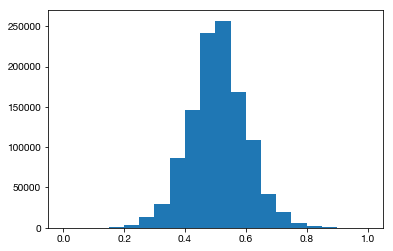

In [133]:
bins = np.linspace(0,1,21)
print np.mean(results[8])
plt.hist(results[8], bins=bins)
plt.show()

In [134]:
fracs = []

for i in game_sizes:
    count = np.sum(np.array(results[i]) > 0.5)
    try:
        frac = 1.*count / len(results[i])
        fracs.append(frac)
        print '%d: \t %.6f \t (N=%d, p=%f)' % (i, frac, len(results[i]), 
                                               binom_test(count, len(results[i]), p=0.5, 
                                                          alternative='greater'))
    except:
        fracs.append(None)
    
total_count = 0
total_games = 0
for i in game_sizes:
    total_count += np.sum(np.array(results[i]) > 0.5)
    total_games += len(results[i])
frac = 1.*total_count/total_games
        
print 'ALL: \t %.6f \t (N=%d, p=%f)' % (frac, total_games, 
                                       binom_test(total_count, total_games, p=0.5, alternative='greater'))

4: 	 0.598706 	 (N=59991, p=0.000000)
6: 	 0.553157 	 (N=45770, p=0.000000)
8: 	 0.534569 	 (N=1128375, p=0.000000)
10: 	 0.540273 	 (N=3737, p=0.000000)
12: 	 0.521650 	 (N=9792, p=0.000010)
14: 	 0.511150 	 (N=3453, p=0.097942)
16: 	 0.502679 	 (N=29864, p=0.178767)
ALL: 	 0.537348 	 (N=1280982, p=0.000000)


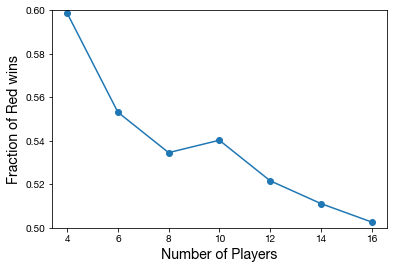

In [135]:
fig, ax = plt.subplots(1,1)

ax.plot(game_sizes, fracs, '-o')
ax.set_ylim(0.5, 0.6)
ax.set_xlabel('Number of Players', fontsize=14)
ax.set_ylabel('Fraction of Red wins', fontsize=14)

plt.show()

In [136]:
ids = []

for line in open(results_file, 'rU'):
    pieces = line.strip().replace('\x00', '').split(',')
    if len(pieces) == 5:
        ids.append(int(pieces[0]))
        
sorted_ids = np.sort(ids)
repeated = 0

# Sort them, and look for duplicated (identical, adjacent) entries.
for i in xrange(len(sorted_ids)-1):
    if sorted_ids[i] == sorted_ids[i+1]:
        repeated += 1
    
# How many game ids are repeated in the results file?
print repeated

0


In [137]:
sp.stats.ttest_1samp(results[8], popmean=0.500)

Ttest_1sampResult(statistic=95.163398680334922, pvalue=0.0)

In [138]:
np.mean(results[8])

0.50855458013784516

0.533898272852


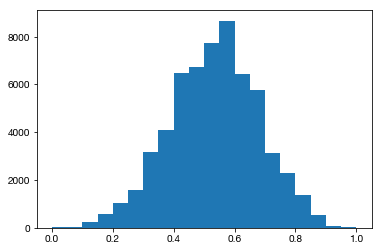

0.515087787979


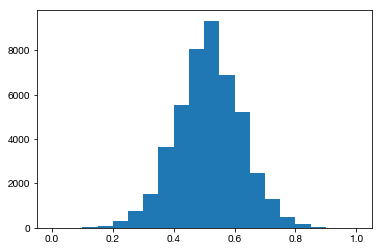

0.508554580138


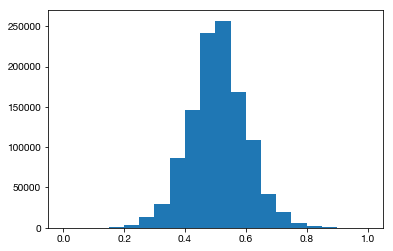

0.509268245263


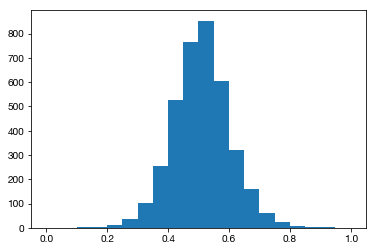

0.506900440188


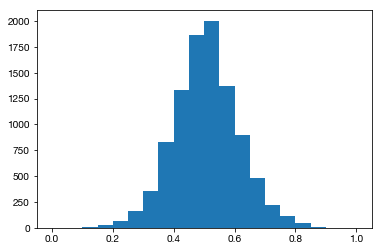

0.504634582926


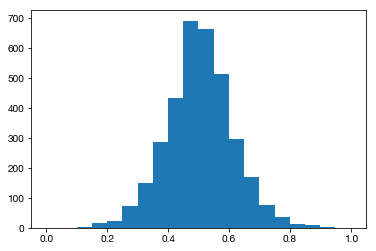

0.502410199463


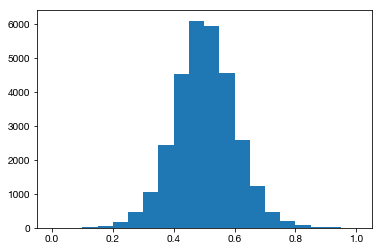

In [139]:
for i in game_sizes:
    fig, ax = plt.subplots(1,1,figsize=(6,4))
    bins = np.linspace(0,1,21)
    print np.mean(results[i])
    plt.hist(results[i], bins=bins)
    plt.show()